# **Import Modules**

In [1]:
import numpy as np
# Import the module matplotlib for visualizing the data
import matplotlib.pyplot as plt

# **Input Generation**

In [23]:
# We use this line to make the code reproducible (to get the same results when running)
np.random.seed(42)
# First, we should declare a variable containing the size of the training set we want to generate
observations = 1000

# Let us assume we have the following relationship
# y = 13x + 2
# y is the output and x is the input or feature
# We generate the feature randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of x is observations by 1. In this case: 1000 x 1.
x = np.random.uniform(low=-10, high=10, size=(observations,1))

# Let us print the shape of the feature vector
print (x.shape)

(1000, 1)


# **Target Generation**

In [24]:
np.random.seed(42)
# We add a small noise to our function for more randomness
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to the f(x) = 13x + 2 + noise definition.
# This is a simple linear relationship with one weight and bias.
# In this way, we are basically saying: the weight is 13 and the bias is 2.
targets = 13*x + + 2 + noise

# Check the shape of the targets just in case. It should be n x m, where n is the number of samples
# and m is the number of output variables, so 1000 x 1.
print (targets.shape)

(1000, 1)


# **Plotting the Data**

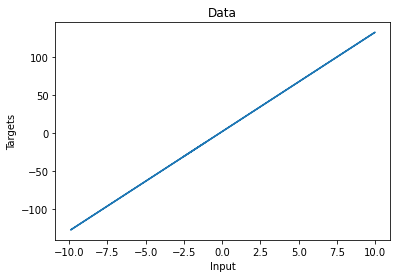

In [27]:
# Plot x and targets
plt.plot(x,targets)

# Add labels to x axis and y axis
plt.ylabel('Targets')
plt.xlabel('Input')

# Add title to the graph
plt.title('Data')

# Show the plot
plt.show()

# **Initialize the Variables**

In [50]:
np.random.seed(42)
# We will initialize the weights and biases randomly within a small initial range.
# init_range is the variable that will measure that.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 1 x 1, since there is only one input (x) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(1, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

# Print the weights to get a sense of how they were initialized.
# You can see that they are far from the actual values.
print (weights)
print (biases)


[[-0.02509198]]
[0.09014286]


# **Learning Rate**

In [45]:
# Set some small learning rate 
# 0.02 is going to work quite well for our example. Once again, you can play around with it.
# It is HIGHLY recommended that you play around with it.
learning_rate = 0.02

# **Training the Model**

In [51]:
# We iterate over our training dataset 100 times. That works well with a learning rate of 0.02.
# We call these iteration epochs.
# Let us define a variable to store the loss of each epoch.
losses = []
for i in range (100):
    
    # This is the linear model: y = xw + b equation
    outputs = np.dot(x,weights) + biases
    # The deltas are the differences between the outputs and the targets
    # Note that deltas here is a vector 1000 x 1
    deltas = outputs - targets
        
    # We are considering the L2-norm loss as our loss function (regression problem), but divided by 2.
    # Moreover, we further divide it by the number of observations to take the mean of the L2-norm.
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # We print the loss function value at each step so we can observe whether it is decreasing as desired.
    print (loss)

    # Add the loss to the list 
    losses.append(loss)
    
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate
    # that can remain the same if we change the number of training samples (observations).
    deltas_scaled = deltas / observations
    
    # Finally, we must apply the gradient descent update rules.
    # The weights are 1 x 1, learning rate is 1 x 1 (scalar), inputs are 1000 x 1, and deltas_scaled are 1000 x 1
    # We must transpose the inputs so that we get an allowed operation.
    weights = weights - learning_rate * np.dot(x.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
    # The weights are updated in a linear algebraic way (a matrix minus another matrix)
    # The biases, however, are just a single number here, so we must transform the deltas into a scalar.
    # The two lines are both consistent with the gradient descent methodology. 

2937.686334634683
297.1734834172693
31.518688397368752
4.734218985229286
1.9783223093180873
1.641711557185489
1.550787380372893
1.4868321190390916
1.4277574534958986
1.371255943274898
1.3170131378827319
1.2649183033992064
1.2148843251394255
1.1668294693565606
1.1206754299260338
1.0763470177056675
1.0337720196352673
0.9928810792464748
0.9536075834918705
0.9158875542107949
0.8796595439043947
0.8448645356349014
0.8114458468845471
0.7793490372173947
0.7485218195935813
0.7189139751915845
0.6904772715996269
0.6631653842431028
0.6369338209199076
0.6117398493207843
0.5875424274166007
0.5643021365992024
0.5419811174668342
0.5205430081495976
0.4999528850744855
0.48017720607336134
0.4611837557414462
0.4429415929570204
0.4254210004770755
0.40859343652669416
0.39243148830328484
0.37690882732001924
0.36200016651559713
0.34768121906058436
0.33392865879315775
0.3207200822198217
0.3080339720191605
0.2958496619892635
0.2841473033815734
0.27290783256650036
0.2621129399779256
0.25174504028619665
0.2417872

# **Visualizing the Training Loss**

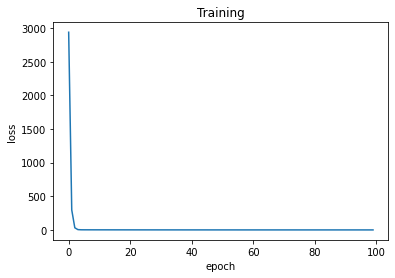

In [53]:
# Plot epochs and losses
plt.plot(range(100),losses)

# Add labels to x axis and y axis
plt.ylabel('loss')
plt.xlabel('epoch')

# Add title to the graph
plt.title('Training')

# Show the plot
# The curve is decreasing in each epoch, which is what we need
# After several epochs, we can see that the curve is flattened.
# This means the algorithm has converged and hence there are no significant updates
# or changes in the weights or biases.
plt.show()

# **Real Vs Predicted Targets**

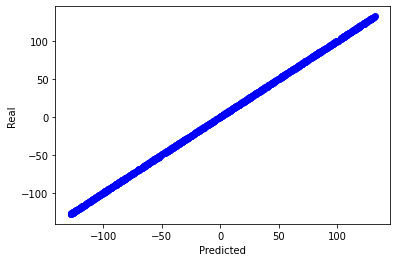

In [57]:
# We print the real and predicted targets in order to see if they have a linear relationship.
# There is almost a total match between the real targets and predicted targets.
# This is a good signal of the success of our machine learning model.
plt.plot(outputs,targets, 'bo')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

In [58]:
# We print the weights and the biases, so we can see if they have converged to what we wanted.
# We know that the real weight is 13 and the bias is 2
print (weights, biases)

[[13.09844702]] [1.73587336]
